### Import Library

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_claims_data = json.load(open("project-data/train-claims.json"))
dev_claims_data = json.load(open("project-data/dev-claims.json"))
evidence_data = json.load(open("project-data/evidence.json"))

label_tags = ["SUPPORTS", "REFUTES", "NOT_ENOUGH_INFO", "DISPUTED"]

In [4]:
train_claims_text = {key: value["claim_text"] for (key, value) in train_claims_data.items()}
train_evidence = {key: value["evidences"] for (key, value) in train_claims_data.items()}
train_label = {key: value["claim_label"] for (key, value) in train_claims_data.items()}

dev_claims_text = {key: value["claim_text"] for (key, value) in dev_claims_data.items()}
dev_evidence = {key: value["evidences"] for (key, value) in dev_claims_data.items()}
dev_label = {key: value["claim_label"] for (key, value) in dev_claims_data.items()}

In [5]:
print(f"Training set size : {len(train_claims_data)}")
assert(len(train_claims_data) == len(train_claims_text))
assert(len(train_claims_data) == len(train_label))
print(f"Evidence data size: {len(evidence_data)}")

Training set size : 1228
Evidence data size: 1208827


In [6]:
cata_0_instant = [key for (key, value) in train_label.items() if value == label_tags[0]]
cata_1_instant = [key for (key, value) in train_label.items() if value == label_tags[1]]
cata_2_instant = [key for (key, value) in train_label.items() if value == label_tags[2]]
cata_3_instant = [key for (key, value) in train_label.items() if value == label_tags[3]]

In [7]:
print(f"Size of [{label_tags[0]: ^18}] instants: {len(cata_0_instant)}")
print(f"Size of [{label_tags[1]: ^18}] instants: {len(cata_1_instant)}")
print(f"Size of [{label_tags[2]: ^18}] instants: {len(cata_2_instant)}")
print(f"Size of [{label_tags[3]: ^18}] instants: {len(cata_3_instant)}")

Size of [     SUPPORTS     ] instants: 519
Size of [     REFUTES      ] instants: 199
Size of [ NOT_ENOUGH_INFO  ] instants: 386
Size of [     DISPUTED     ] instants: 124


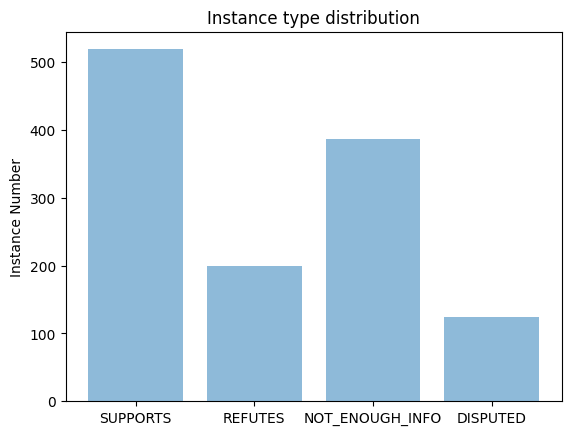

In [12]:
x_pos = np.arange(len(label_tags))
instance_num = [len(cata_0_instant), len(cata_1_instant), len(cata_2_instant), len(cata_3_instant)]

plt.bar(x_pos, instance_num, align='center', alpha=0.5)
plt.xticks(x_pos, label_tags)
plt.ylabel('Instance Number')
plt.title('Instance type distribution')

plt.show()